<a href="https://colab.research.google.com/github/yiwenwangANU/pytorch_review/blob/main/03_Computer_Vision_from_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Download and explore

In [145]:
import kagglehub
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [146]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [147]:
import os
for root, dirs, files in os.walk(path):
    print(f"Current Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Current Directory: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4
Subdirectories: []
Files: ['train-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte']
----------------------------------------


In [148]:
import pandas as pd

df_train = pd.read_csv(path + "/fashion-mnist_train.csv")
df_test = pd.read_csv(path + "/fashion-mnist_test.csv")

In [149]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [151]:
df_train.isnull().sum()

,0
label,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [152]:
df_train.iloc[:,1:].max().max(), df_train.iloc[:,1:].min().min()

(255, 0)

In [153]:
train_labels = df_train['label'].values
train_images = df_train.drop('label', axis=1).values

test_labels = df_test['label'].values
test_images = df_test.drop('label', axis=1).values

In [154]:
# from dataset description
labeldict = {
  0: "T-shirt",
  1: "Trouser",
  2: "Pullover",
  3: "Dress",
  4: "Coat",
  5: "Sandal",
  6: "Shirt",
  7: "Sneaker",
  8: "Bag",
  9: "Ankle boot",
}

In [155]:
train_images.shape

(60000, 784)

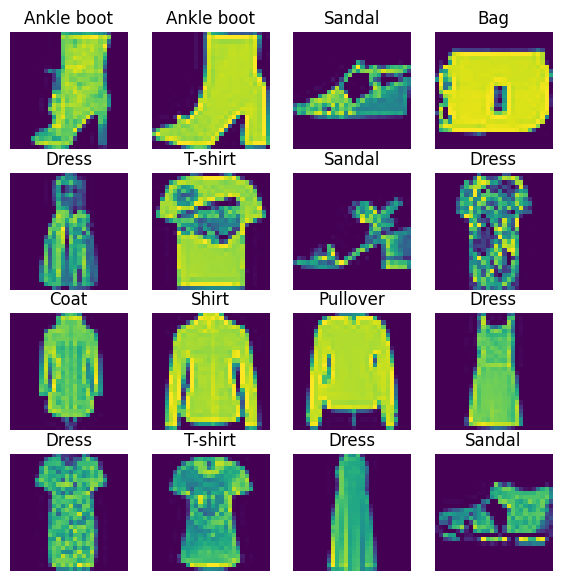

In [156]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for n in range(16):
  randomValue = random.randint(0, 59999)
  image = train_images[randomValue].reshape(28, 28)
  label = labeldict[train_labels[randomValue]]

  plt.subplot(4, 4, n+1)
  plt.title(label)
  plt.imshow(image)
  plt.axis("off")
plt.show()

###Data Preprocessing

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [158]:
X_train = torch.tensor(X_train, dtype=torch.float).view(-1, 1, 28, 28).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)

X_val = torch.tensor(X_val, dtype=torch.float).view(-1, 1, 28, 28).to(device)
y_val = torch.tensor(y_val, dtype=torch.long).to(device)

test_images = torch.tensor(test_images, dtype=torch.float).view(-1, 1, 28, 28).to(device)
test_labels = torch.tensor(test_labels, dtype=torch.long).to(device)

In [159]:
X_train = X_train / 255.
X_val = X_val / 255.
test_images= test_images / 255.

In [160]:
X_train.shape

torch.Size([48000, 1, 28, 28])

In [161]:
# customer dataset
from torch.utils.data import Dataset

class FashionMnistDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = data
        self.target = target
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]

        # Apply transformation if specified
        if self.transform:
            x = self.transform(x)  # Pass tensor through transforms
        return x, y

In [162]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize to [-1, 1]
])

In [163]:
train_dataset = FashionMnistDataset(data=X_train, target=y_train, transform=transform)
val_dataset = FashionMnistDataset(data=X_val, target=y_val, transform=transform)
test_dataset = FashionMnistDataset(data=test_images, target=test_labels, transform=transform)

In [164]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [165]:
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Images shape: {images.shape}")  # Shape of the image tensor
    print(f"Labels shape: {labels.shape}")  # Shape of the label tensor
    print(f"Images data type: {images.dtype}")
    print(f"Labels data type: {labels.dtype}")
    print(f"First image tensor:\n{images[0]}")
    print(f"First label tensor: {labels[0]}")
    break  # Break after the first batch to avoid excessive output

Batch 1:
Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Images data type: torch.float32
Labels data type: torch.int64
First image tensor:
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -0.4039,  0.1137,  0.1059,  0.1843,  0.2078,
           0.2392,  0.2549, -0.1608, -0.4980, -0.1373, -0.6784, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9686,
          -1.0000, -1.0000,  0.9765,  0.9373,  0.8353,  0.8431,  0.9922,
           1.0000,  0.8902,  0.9294,  0.8275,  0.9843,  0.2471, -1.0000,
          -0.9922, -0.9922, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -1.0000,
          -1.0000, -1.0000,  0.5922,  0.7882,  0.7020,  0.7098,  0.7490,
           0.4980,  0.7255,  0.7255,  0.6706,  0.7804, -0.0039, -1.0000,
          -1.0000, -1.0000, -0.

###Linear Model

In [166]:
from torch import nn

class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 10),
        nn.Linear(10, 10)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_0 = LinearModel().to(device)

In [167]:
!pip install torchmetrics
import torchmetrics
# initialize metric
metric = torchmetrics.classification.Accuracy(task="multiclass", num_classes=10).to(device)

In [168]:
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

In [169]:
epoches = 5
for epoch in range(epoches):
  model_0.train()
  train_loss = 0.0
  for X_train, y_train in train_loader:
    y_logits = model_0(X_train)
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  model_0.eval()
  val_loss = 0.0
  with torch.inference_mode():
    for X_val, y_val in val_loader:
      val_logits = model_0(X_val)
      loss = loss_fn(val_logits, y_val)
      val_pred = torch.argmax(val_logits, dim=1)
      acc = metric(val_pred, y_val)
      val_loss += loss.item()
  acc = metric.compute()
  print(f'epoch: {epoch}, train loss: {train_loss:.2f}, val loss: {val_loss:.2f}, accuracy: {acc:.4f}')

epoch: 0, train loss: 436.81, val loss: 106.49, accuracy: 0.8010
epoch: 1, train loss: 386.63, val loss: 95.51, accuracy: 0.8137
epoch: 2, train loss: 363.48, val loss: 90.53, accuracy: 0.8204
epoch: 3, train loss: 364.65, val loss: 110.25, accuracy: 0.8140
epoch: 4, train loss: 360.31, val loss: 94.77, accuracy: 0.8148


###CNN Model

**Formula for the output size of a convolution layer:**


$$
\text{out_size} = \frac{\text{in_size} + 2 \times \text{padding} - \text{kernel_size}}{\text{stride}} + 1
$$

In [170]:
class FashionMnist(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3, padding=1), # keep the image size (28*28)
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # decrease image size to (14*14)
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(128*7*7, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 10)
    )
  def forward(self, x):
    return self.layer_stack(x)

model = FashionMnist().to(device)

In [171]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=.001)

In [172]:
import torch.optim.lr_scheduler as lr_scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

In [173]:
images, labels = next(iter(train_loader))
images.shape

torch.Size([64, 1, 28, 28])

In [174]:
y_logits = model(images).squeeze()
y_logits.shape

torch.Size([64, 10])

In [175]:
y_pred = torch.argmax(torch.round(torch.softmax(y_logits, dim=1)), dim=1)
y_pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [176]:
epoches = 8
for epoch in range(epoches):
  model.train()
  train_loss = 0.0
  for X_train, y_train in train_loader:
    y_logits = model(X_train)
    loss = loss_fn(y_logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  scheduler.step()

  model.eval()
  val_loss = 0.0
  with torch.inference_mode():
    test_loss = 0.0
    for X_val, y_val in val_loader:
      val_logits = model(X_val)
      loss = loss_fn(val_logits, y_val)
      val_pred = torch.argmax(val_logits, dim=1)
      acc = metric(val_pred, y_val)
      val_loss += loss.item()
  acc = metric.compute()
  print(f'epoch: {epoch}, train loss: {train_loss:.2f}, val loss: {val_loss:.2f}, accuracy: {acc:.4f}')

epoch: 0, train loss: 289.86, val loss: 50.40, accuracy: 0.8289
epoch: 1, train loss: 197.14, val loss: 43.45, accuracy: 0.8417
epoch: 2, train loss: 165.93, val loss: 41.05, accuracy: 0.8517
epoch: 3, train loss: 124.48, val loss: 38.11, accuracy: 0.8601
epoch: 4, train loss: 109.43, val loss: 37.15, accuracy: 0.8671
epoch: 5, train loss: 93.50, val loss: 38.70, accuracy: 0.8727
epoch: 6, train loss: 68.98, val loss: 38.67, accuracy: 0.8773
epoch: 7, train loss: 58.14, val loss: 38.66, accuracy: 0.8813
